Загрузка данных

In [2]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/seller_data.xlsx')

df

,Seller_ID,Order_Value,Commission_Rate,Promotion_Used,Subscription,Promotion_Income,Subscription_Income
0,1,2248.357077,0.086699,True,False,5000,0
1,2,1930.867849,0.084183,True,True,5000,3000
2,3,2323.844269,0.105457,True,False,5000,0
3,4,2761.514928,0.108259,True,False,5000,0
4,5,1882.923313,0.081263,False,False,0,0
...,...,...,...,...,...,...,...
995,996,1859.449854,0.091227,False,True,0,3000
996,997,2898.843263,0.088280,True,False,5000,0
997,998,2320.421431,0.100663,False,False,0,0
998,999,1714.410505,0.080220,False,False,0,0


Приведение столбцов к стилю camel_case

In [3]:
# Функция для преобразования в camelCase
def to_camel_case(s):
    parts = s.split('_')
    return parts[0].lower() + ''.join(part.capitalize() for part in parts[1:])

df.columns = [to_camel_case(col) for col in df.columns]

print(df.columns)

Index(['sellerId', 'orderValue', 'commissionRate', 'promotionUsed',
       'subscription', 'promotionIncome', 'subscriptionIncome'],
      dtype='object')


Вверху представлена таблица с данными по продавцам компании MarketPro. Это маркетплейс, который специализируется на продаже
различных товаров через веб-платформу. Есть три основных источника дохода:
   1)комиссия с продавцов за каждую продажу
   2)плата за продвижение товаров на платформе
   3)абонентская плата за подписку на расширенные функции продавцов
Исходные данные:
   - стоимость подписки составляет 3 тысячи рублей в месяц;
   - средний доход с одного покупателя составляет 2 тысячи рублей;
   - средняя продолжительность взаимодействия для покупателей (в месяцах) — 24 месяца;
   - средняя продолжительность взаимодействия для продавцов (в месяцах) — 18 месяцев

Наша задача Расчитать ключевые метрики:

- средний чек рассчитывается как среднее значение суммы заказов;
- средняя комиссия рассчитывается как произведение суммы заказа на процент комиссии;
- средний доход продавца включает доход от комиссии, платного продвижения и подписки;
- процент продавцов, использующих платные инструменты продвижения;
- процент продавцов, использующих платную подписку.

In [4]:
# Расчеты ключевых метрик
average_check = df['orderValue'].mean()  # Средний чек
df['commissionIncome'] = df['orderValue'] * df['commissionRate']  # Доход от комиссии
average_commission = df['commissionIncome'].mean()  # Средняя комиссия

# Средний доход с продавца (комиссия + продвижение + подписка)
df['sellerIncome'] = df['commissionIncome'] + df['promotionIncome'] + df['subscriptionIncome']
average_seller_income = df['sellerIncome'].mean()

# Процент продавцов, использующих продвижение
promotion_users_percentage = (df['promotionUsed'].mean()) * 100

# Процент продавцов, использующих подписку
subscription_users_percentage = (df['subscription'].mean()) * 100

# Результаты расчётов в таблице
results = pd.DataFrame({
    'Метрика': [
        'Средний чек',
        'Средняя комиссия',
        'Средний доход с продавца',
        'Процент продавцов, использующих продвижение',
        'Процент продавцов, использующих подписку'
    ],
    'Значение': [
        round(average_check, 2),
        round(average_commission, 2),
        round(average_seller_income, 2),
        round(promotion_users_percentage, 2),
        round(subscription_users_percentage, 2)
    ]
})

print(results)

                                       Метрика  Значение
0                                  Средний чек   2009.67
1                             Средняя комиссия    201.39
2                     Средний доход с продавца   3338.39
3  Процент продавцов, использующих продвижение     50.80
4     Процент продавцов, использующих подписку     19.90


Дополнительные вводные (затраты):
   1) маркетинговые расходы на привлечение покупателей: 3 млн рублей в месяц
   2) средний объем привлекаемых покупателей: 2000 человек в месяц
   3) средний объем привлекаемых продавцов: 500 человек в месяц
   4) операционные расходы на поддержание платформы: 1,5 млн рублей в месяц
   5) расходы на обслуживание каждого продавца: 1000 рублей в месяц
   6) удержание продавцов: 40%
   7) удержание покупателей: 20%

Цель — опираясь на расходы, исходные данные, данные из таблицы и те данные, которые уже рассчитаны, провести расчёты ключевых показателей юнит-экономики для покупателей и продавцов (CAC, LTV и ROI), определить проблемные зоны в модели бизнеса и предложить планы по оптимизации CAC и увеличению LTV.

In [5]:
# Исходные данные
marketing_expenses = 3000000  # Маркетинговые расходы (руб.)
buyers_per_month = 2000  # Привлеченные покупатели в месяц
sellers_per_month = 500  # Привлеченные продавцы в месяц
seller_retention = 0.4  # Удержание продавцов
buyer_retention = 0.2  # Удержание покупателей
seller_lifetime = 18  # Средняя продолжительность взаимодействия продавцов (мес.)
buyer_lifetime = 24  # Средняя продолжительность взаимодействия покупателей (мес.)
average_check = 2009.67  # Средний чек (руб.)
average_commission = 201.39  # Средняя комиссия с продажи (руб.)
average_seller_income = 3338.39  # Средний доход с продавца (руб.)
seller_service_cost = 1000  # Затраты на обслуживание продавца (руб./мес.)

# Расчет CAC
cac_buyers = marketing_expenses / buyers_per_month  # CAC покупателей
cac_sellers = marketing_expenses / sellers_per_month  # CAC продавцов

# Расчет LTV
ltv_buyers = average_check * (average_commission / average_check) * buyer_lifetime * buyer_retention  # LTV покупателей
ltv_sellers = (average_seller_income - seller_service_cost) * seller_lifetime * seller_retention  # LTV продавцов

# Расчет ROI
roi_buyers = (ltv_buyers - cac_buyers) / cac_buyers
roi_sellers = (ltv_sellers - cac_sellers) / cac_sellers

# Формирование таблицы результатов
results = pd.DataFrame({
    'Метрика': ['CAC покупателей', 'LTV покупателей', 'ROI покупателей',
                'CAC продавцов', 'LTV продавцов', 'ROI продавцов'],
    'Значение': [
        round(cac_buyers, 2),
        round(ltv_buyers, 2),
        f"{round(roi_buyers * 100, 2)}%",
        round(cac_sellers, 2),
        round(ltv_sellers, 2),
        f"{round(roi_sellers * 100, 2)}%"
    ]
})

print(results)

           Метрика  Значение
0  CAC покупателей    1500.0
1  LTV покупателей    966.67
2  ROI покупателей   -35.56%
3    CAC продавцов    6000.0
4    LTV продавцов  16836.41
5    ROI продавцов   180.61%


Загружаем таблицу для когортного анализа клиентов

In [6]:
df = pd.read_excel('/content/drive/MyDrive/cohort_analysis_data.xlsx')

df

,user_id,registration_date,activity_1_month,activity_3_month,activity_6_month,activity_12_month
0,1,2021-06-09,0,1,0,0
1,2,2021-08-09,0,0,0,0
2,3,2021-07-12,0,0,0,0
3,4,2022-04-13,0,0,0,0
4,5,2021-01-24,1,0,0,0
...,...,...,...,...,...,...
995,996,2021-10-30,1,0,0,0
996,997,2022-10-03,0,0,0,0
997,998,2022-12-25,1,1,0,0
998,999,2021-06-04,0,1,0,0


Приведение столбцов к стилю camel_case

In [7]:
# Функция для преобразования в camelCase
def to_camel_case(s):
    parts = s.split('_')
    return parts[0].lower() + ''.join(part.capitalize() for part in parts[1:])

df.columns = [to_camel_case(col) for col in df.columns]

print(df.columns)

Index(['userId', 'registrationDate', 'activity1Month', 'activity3Month',
       'activity6Month', 'activity12Month'],
      dtype='object')


Нам нужно будет сделать когортный анализ для выявления спада активности покупателей. Сделаем таблицу для когортного анализа, где каждая строка будет представлять когорту по месяцу регистрации, а каждый столбец период (1, 3, 6, 12 месяцев). Будем проверять активность пользователей на этих этапах времени. Под активностью будет подразумеваться покупка, совершенная через указанный промежуток. Визуализируем это всё в виде тепловой карты, отображающей удержание в процентах.

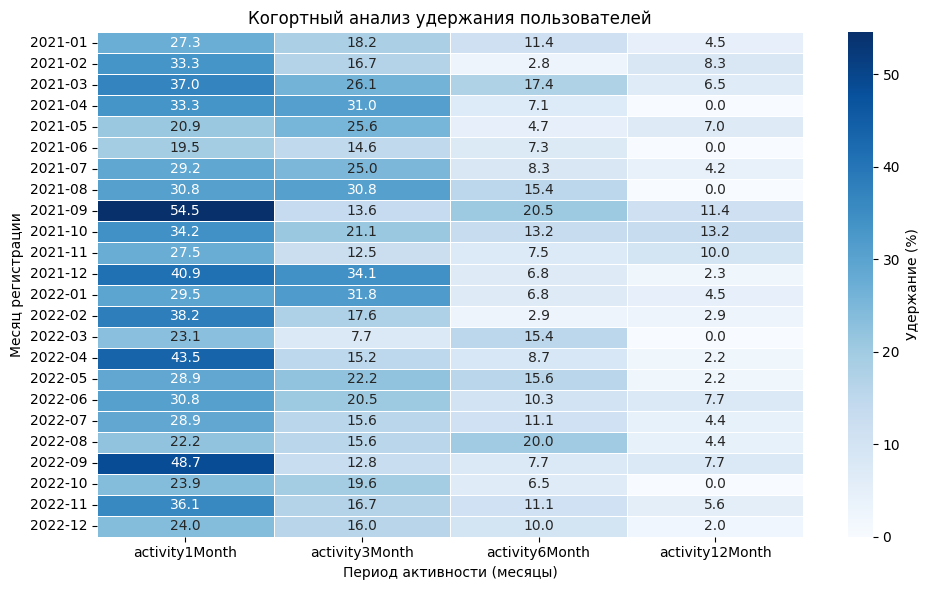

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Преобразуем даты регистрации в формат datetime
df['registrationDate'] = pd.to_datetime(df['registrationDate'])

# Добавляем столбец с месяцем регистрации
df['registrationMonth'] = df['registrationDate'].dt.to_period('M')

# Считаем когортный анализ
cohort_analysis = df.groupby('registrationMonth').agg({
    'activity1Month': 'mean',
    'activity3Month': 'mean',
    'activity6Month': 'mean',
    'activity12Month': 'mean'
}).reset_index()

# Преобразуем значения в проценты
cohort_analysis.iloc[:, 1:] = cohort_analysis.iloc[:, 1:] * 100

# Визуализация тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(
    cohort_analysis.set_index('registrationMonth'),
    annot=True,
    fmt=".1f",
    cmap='Blues',
    linewidths=0.5,
    cbar_kws={'label': 'Удержание (%)'}
)

plt.title("Когортный анализ удержания пользователей")
plt.xlabel("Период активности (месяцы)")
plt.ylabel("Месяц регистрации")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Теперь тоже самое сделаем для продавцов. Загружаем данные.

In [9]:
df = pd.read_excel('/content/drive/MyDrive/sellers_cohort_analysis_data.xlsx')

df

,seller_id,registration_date,activity_1_month,activity_3_month,activity_6_month,activity_12_month
0,1,2021-03-23,1,0,0,0
1,2,2022-11-30,0,0,0,1
2,3,2021-11-17,0,1,0,0
3,4,2021-09-06,1,1,0,0
4,5,2021-01-04,1,1,0,0
...,...,...,...,...,...,...
495,496,2022-03-18,0,0,0,0
496,497,2021-12-17,1,1,0,0
497,498,2021-05-24,1,1,0,0
498,499,2021-08-20,1,0,0,0


Приведение столбцов к стилю camel_case

In [10]:
# Функция для преобразования в camelCase
def to_camel_case(s):
    parts = s.split('_')
    return parts[0].lower() + ''.join(part.capitalize() for part in parts[1:])

df.columns = [to_camel_case(col) for col in df.columns]

print(df.columns)

Index(['sellerId', 'registrationDate', 'activity1Month', 'activity3Month',
       'activity6Month', 'activity12Month'],
      dtype='object')


Сделаем таблицу для когортного анализа, где каждая строка будет представлять когорту по месяцу регистрации, а каждый столбец период (1, 3, 6, 12 месяцев). Будем проверять активность пользователей на этих этапах времени. Под активностью будет подразумеваться покупка, совершенная через указанный промежуток. Визуализируем в виде тепловой карты, отображающей удержание в процентах.

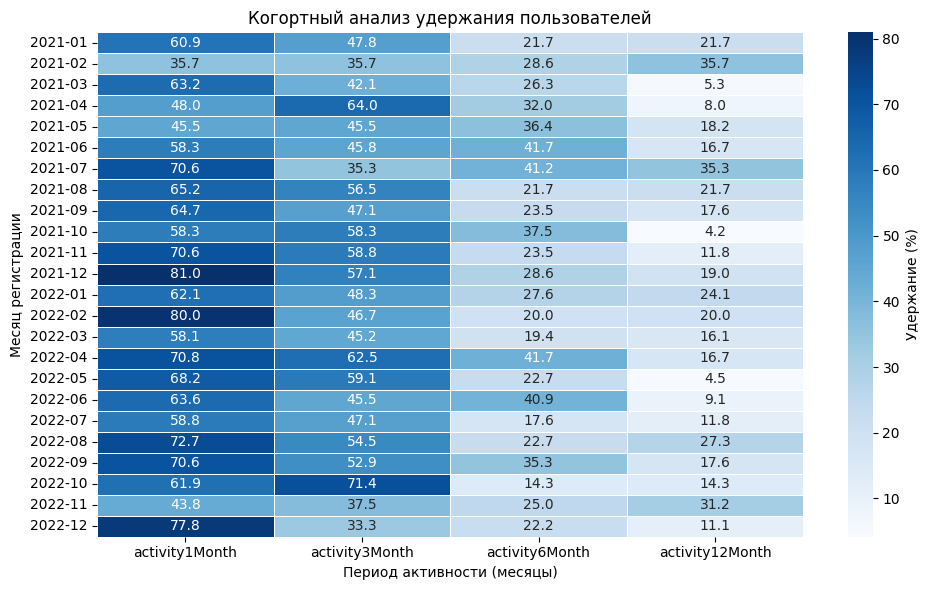

In [11]:
# Добавляем столбец с месяцем регистрации
df['registrationMonth'] = df['registrationDate'].dt.to_period('M')

# Считаем когортный анализ
cohort_analysis = df.groupby('registrationMonth').agg({
    'activity1Month': 'mean',
    'activity3Month': 'mean',
    'activity6Month': 'mean',
    'activity12Month': 'mean'
}).reset_index()

# Преобразуем значения в проценты
cohort_analysis.iloc[:, 1:] = cohort_analysis.iloc[:, 1:] * 100

# Визуализация тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(
    cohort_analysis.set_index('registrationMonth'),
    annot=True,
    fmt=".1f",
    cmap='Blues',
    linewidths=0.5,
    cbar_kws={'label': 'Удержание (%)'}
)

plt.title("Когортный анализ удержания пользователей")
plt.xlabel("Период активности (месяцы)")
plt.ylabel("Месяц регистрации")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()